In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
ds = pd.read_csv('diabetes_pp.csv')

<Axes: xlabel='Insulin'>

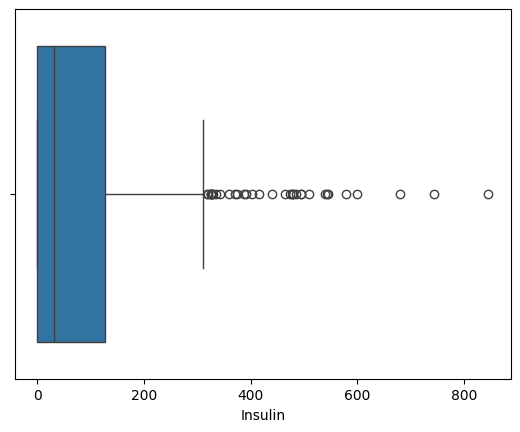

In [15]:
# sns.boxplot(x=ds['Glucose'])
sns.boxplot(x=ds['Insulin'])

In [29]:
q1 = np.percentile(ds['Glucose'], 25, method='midpoint')
q3 = np.percentile(ds['Glucose'], 75, method='midpoint')
IQR = q3 - q1
low = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

outliers_indices = ds[(ds['Glucose'] < low) | (ds['Glucose'] > upper)].index
ds_neg_median = ds[ds['Outcome'] == 0]['Glucose'].median()
ds_neg_std = ds[ds['Outcome'] == 0]['Glucose'].std()
ds_pos_median = ds[ds['Outcome'] == 1]['Glucose'].median()
ds_pos_std = ds[ds['Outcome'] == 1]['Glucose'].std()
for idx in outliers_indices:
    if ds.loc[idx, 'Outcome'] == 0:
        replacement_value = np.random.normal(loc=ds_neg_median, scale=ds_neg_std)
    else:
        replacement_value = np.random.normal(loc=ds_pos_median, scale=ds_pos_std)
    ds.at[idx, 'Glucose'] = replacement_value



In [18]:
q1 = np.percentile(ds['Insulin'], 25, method='midpoint')
q3 = np.percentile(ds['Insulin'], 75, method='midpoint')
IQR = q3 - q1
low = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

outliers_indices = ds[(ds['Insulin'] < low) | (ds['Insulin'] > upper)].index

ds_skin_median = ds['Insulin'].median()
ds_skin_std = ds['Insulin'].std()

print(q1)
print(q3)

print(ds_skin_median)
print(ds_skin_std)
for idx in outliers_indices:
    replacement_value = np.random.normal(loc=ds_skin_median, scale=ds_skin_std)

    ds.at[idx, 'Insulin'] = replacement_value

0.0
126.5
30.5
115.20491163354842


C:\Users\edorj\AppData\Local\Temp\ipykernel_6780\167746704.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '178.8248131557043' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ds.at[idx, 'Insulin'] = replacement_value


In [12]:
y = ds['Outcome']
x = ds.drop('Outcome', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



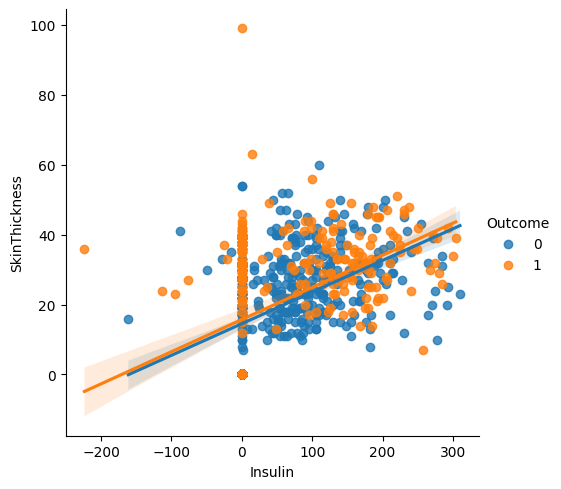

In [13]:
sns.lmplot(x="Insulin", y="SkinThickness", hue ='Outcome', data=ds)

In [32]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,60,23,94,28.1,0.167,21,0
4,0,137,40,35,50,28.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
